In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import re
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import statsmodels.api as sm

In [2]:
datafile = "/Users/mattelms/Documents/School/R-Intro-Data-Science/Spotify_Program/PySpotify/everything_playlist.csv"
df = pd.read_csv(datafile)
df_clean = pd.DataFrame(df)
df_clean = df_clean.drop(columns=['Duration_ms', 'Mode'])

In [3]:
df_clean

,Song,Artist,Genres,Album,Release_Date,Popularity,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,100 Grandkids,Mac Miller,"['hip hop', 'pittsburgh rap', 'rap']",GO:OD AM,2015-09-18,65,0.735,0.749,10,-3.766,0.0874,0.3710,0.000000,0.4700,0.373,93.718
1,10:35,Tiësto,"['big room', 'brostep', 'dutch edm', 'edm', 'h...",10:35,2022-11-03,89,0.696,0.793,8,-5.733,0.0970,0.0683,0.000004,0.1800,0.698,120.003
2,"1, 2 Many",Luke Combs,"['contemporary country', 'country']",What You See Is What You Get,2019-11-08,73,0.540,0.821,6,-3.789,0.0873,0.0397,0.000000,0.4230,0.685,148.798
3,1901,Phoenix,"['alternative dance', 'indie rock', 'modern ro...",Wolfgang Amadeus Phoenix,2009-05-25,6,0.591,0.831,0,-5.647,0.0415,0.0605,0.000047,0.1900,0.705,144.084
4,2055,Sleepy Hallow,"['brooklyn drill', 'nyc rap']",Still Sleep?,2021-06-02,82,0.829,0.512,6,-5.865,0.1870,0.4920,0.000000,0.1200,0.638,80.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,Daylight,David Kushner,['gen z singer-songwriter'],Daylight,2023-04-14,94,0.508,0.430,2,-9.475,0.0335,0.8300,0.000441,0.0930,0.324,130.090
877,Violet,Connor Price,[],Spin The Globe,2023-01-27,71,0.924,0.716,8,-7.158,0.0541,0.0177,0.000001,0.1280,0.480,119.973
878,Spinnin,Connor Price,[],Spin The Globe,2023-01-27,74,0.765,0.572,11,-6.153,0.1280,0.2260,0.000000,0.1920,0.475,140.013
879,Buddy,Connor Price,[],Buddy,2022-12-30,69,0.914,0.506,6,-5.373,0.2230,0.2040,0.000000,0.1030,0.428,140.015


In [4]:
# MAJOR BATHING OF DATA AHEAD

# Min - Max for tempo
min_tempo = df_clean['Tempo'].min()
max_tempo = df_clean['Tempo'].max()

# Scale the values in tempo to range from 0 to 1
df_clean['Tempo'] = (df_clean['Tempo'] - min_tempo) / (max_tempo - min_tempo)

# Min - Max for loudness
min_loudness = df_clean['Loudness'].min()
max_loudness = df_clean['Loudness'].max()

# Scale the values in loudness to range from 0 to 1
df_clean['Loudness'] = (df_clean['Loudness'] - min_loudness) / (max_loudness - min_loudness)

# Convert 'Release Date' to an actual date
df_clean['Release_Date'] = pd.to_datetime(df_clean['Release_Date'])

In [5]:
df_clean

,Song,Artist,Genres,Album,Release_Date,Popularity,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,100 Grandkids,Mac Miller,"['hip hop', 'pittsburgh rap', 'rap']",GO:OD AM,2015-09-18,65,0.735,0.749,10,0.811862,0.0874,0.3710,0.000000,0.4700,0.373,0.280841
1,10:35,Tiësto,"['big room', 'brostep', 'dutch edm', 'edm', 'h...",10:35,2022-11-03,89,0.696,0.793,8,0.700227,0.0970,0.0683,0.000004,0.1800,0.698,0.444883
2,"1, 2 Many",Luke Combs,"['contemporary country', 'country']",What You See Is What You Get,2019-11-08,73,0.540,0.821,6,0.810556,0.0873,0.0397,0.000000,0.4230,0.685,0.624590
3,1901,Phoenix,"['alternative dance', 'indie rock', 'modern ro...",Wolfgang Amadeus Phoenix,2009-05-25,6,0.591,0.831,0,0.705108,0.0415,0.0605,0.000047,0.1900,0.705,0.595171
4,2055,Sleepy Hallow,"['brooklyn drill', 'nyc rap']",Still Sleep?,2021-06-02,82,0.829,0.512,6,0.692736,0.1870,0.4920,0.000000,0.1200,0.638,0.198417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,Daylight,David Kushner,['gen z singer-songwriter'],Daylight,2023-04-14,94,0.508,0.430,2,0.487855,0.0335,0.8300,0.000441,0.0930,0.324,0.507835
877,Violet,Connor Price,[],Spin The Globe,2023-01-27,71,0.924,0.716,8,0.619353,0.0541,0.0177,0.000001,0.1280,0.480,0.444696
878,Spinnin,Connor Price,[],Spin The Globe,2023-01-27,74,0.765,0.572,11,0.676390,0.1280,0.2260,0.000000,0.1920,0.475,0.569764
879,Buddy,Connor Price,[],Buddy,2022-12-30,69,0.914,0.506,6,0.720658,0.2230,0.2040,0.000000,0.1030,0.428,0.569777


In [6]:
df_clean = df_clean.drop_duplicates(subset=['Song', 'Artist'], keep='first')
df_clean = df_clean.sort_values('Song').reset_index(drop=True)

In [7]:
df_clean['Genres'] = df_clean['Genres'].replace(to_replace=r"[\[\]']", value='', regex=True)
df_clean['Genre'] = df_clean['Genres'].str.split(',').str[0]
df_clean = df_clean.drop('Genres', axis=1)
df_clean

,Song,Artist,Album,Release_Date,Popularity,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,'Til You Can't,Cody Johnson,Human The Double Album,2021-10-08,75,0.501,0.815,1,0.749489,0.0436,0.05130,0.000000,0.1060,0.460,0.695044,classic texas country
1,"1, 2 Many",Luke Combs,What You See Is What You Get,2019-11-08,73,0.540,0.821,6,0.810556,0.0873,0.03970,0.000000,0.4230,0.685,0.624590,contemporary country
2,100 Grandkids,Mac Miller,GO:OD AM,2015-09-18,65,0.735,0.749,10,0.811862,0.0874,0.37100,0.000000,0.4700,0.373,0.280841,hip hop
3,10:35,Tiësto,10:35,2022-11-03,89,0.696,0.793,8,0.700227,0.0970,0.06830,0.000004,0.1800,0.698,0.444883,big room
4,1901,Phoenix,Wolfgang Amadeus Phoenix,2009-05-25,6,0.591,0.831,0,0.705108,0.0415,0.06050,0.000047,0.1900,0.705,0.595171,alternative dance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,my ex's best friend (with blackbear),Machine Gun Kelly,Tickets To My Downfall,2020-09-25,77,0.731,0.675,5,0.734222,0.0434,0.00473,0.000000,0.1410,0.298,0.475689,ohio hip hop
871,ocean eyes,Billie Eilish,Summer Heartbreak,2021-08-13,0,0.358,0.372,4,0.590636,0.0464,0.81000,0.053900,0.0877,0.160,0.599845,art pop
872,oops!,Yung Gravy,Gasanova,2020-10-02,69,0.886,0.743,6,0.639841,0.0812,0.03580,0.000198,0.0511,0.941,0.519144,meme rap
873,oui,Jeremih,Late Nights: The Album,2015-12-04,77,0.418,0.724,5,0.814245,0.0964,0.21300,0.000000,0.1120,0.604,0.185998,chicago rap


In [8]:
df_clean = df_clean[['Song','Artist', 'Genre', 'Album', 'Release_Date', 'Popularity', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]
df_clean

,Song,Artist,Genre,Album,Release_Date,Popularity,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,'Til You Can't,Cody Johnson,classic texas country,Human The Double Album,2021-10-08,75,0.501,0.815,1,0.749489,0.0436,0.05130,0.000000,0.1060,0.460,0.695044
1,"1, 2 Many",Luke Combs,contemporary country,What You See Is What You Get,2019-11-08,73,0.540,0.821,6,0.810556,0.0873,0.03970,0.000000,0.4230,0.685,0.624590
2,100 Grandkids,Mac Miller,hip hop,GO:OD AM,2015-09-18,65,0.735,0.749,10,0.811862,0.0874,0.37100,0.000000,0.4700,0.373,0.280841
3,10:35,Tiësto,big room,10:35,2022-11-03,89,0.696,0.793,8,0.700227,0.0970,0.06830,0.000004,0.1800,0.698,0.444883
4,1901,Phoenix,alternative dance,Wolfgang Amadeus Phoenix,2009-05-25,6,0.591,0.831,0,0.705108,0.0415,0.06050,0.000047,0.1900,0.705,0.595171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,my ex's best friend (with blackbear),Machine Gun Kelly,ohio hip hop,Tickets To My Downfall,2020-09-25,77,0.731,0.675,5,0.734222,0.0434,0.00473,0.000000,0.1410,0.298,0.475689
871,ocean eyes,Billie Eilish,art pop,Summer Heartbreak,2021-08-13,0,0.358,0.372,4,0.590636,0.0464,0.81000,0.053900,0.0877,0.160,0.599845
872,oops!,Yung Gravy,meme rap,Gasanova,2020-10-02,69,0.886,0.743,6,0.639841,0.0812,0.03580,0.000198,0.0511,0.941,0.519144
873,oui,Jeremih,chicago rap,Late Nights: The Album,2015-12-04,77,0.418,0.724,5,0.814245,0.0964,0.21300,0.000000,0.1120,0.604,0.185998


In [9]:
print(df_clean['Genre'].unique())

['classic texas country' 'contemporary country' 'hip hop' 'big room'
 'alternative dance' 'brooklyn drill' 'pop' 'dance pop' 'danish pop'
 'adult standards' 'hopebeat' 'lilith' 'modern indie pop'
 'alternative metal' 'edm' 'indie pop rap' 'girl group' 'folk-pop'
 'candy pop' 'chicago rap' 'nu metal' 'piano rock' 'electropop' 'emo'
 'modern rock' 'classic oklahoma country' 'social media pop'
 'australian hip hop' 'dance rock' 'atl hip hop' 'album rock' ''
 'country pop' 'future funk' 'classic rock' 'ohio hip hop' 'flamenco'
 'pov: indie' 'brostep' 'indie rock italiano' 'black americana'
 'scandipop' 'indietronica' 'canadian contemporary r&b'
 'australian country' 'australian dance' 'classic hardstyle'
 'acoustic pop' 'trap' 'alternative rock' 'pittsburgh indie' 'country'
 'dfw rap' 'complextro' 'pop rock' 'new romantic'
 'modern alternative rock' 'la pop' 'detroit hip hop' 'australian pop'
 'chicago house' 'sad rap' 'british alternative rock' 'metropopolis'
 'brooklyn indie' 'gen z sing

In [10]:
# ChatGPT gets an award for this... JESUS
genre_map = {
    'classic texas country': 'Country',
    'contemporary country': 'Country',
    'country pop': 'Country',
    'classic oklahoma country': 'Country',
    'australian country': 'Country',
    'country': 'Country',
    'country rock': 'Country',
    'classic country pop': 'Country',
    'arkansas country': 'Country',
    'modern southern rock': 'Country',
    'country rap': 'Country',
    'redneck': 'Country',
    'modern country pop': 'Country',

    'big room': 'EDM',
    'edm': 'EDM',
    'brostep': 'EDM',
    'complextro': 'EDM',
    'dutch house': 'EDM',
    'europop': 'EDM',
    'dancefloor dnb': 'EDM',
    'deep pop edm': 'EDM',
    'dutch edm': 'EDM',
    'australian dance': 'EDM',
    'classic hardstyle': 'EDM',
    'aussietronica': 'EDM',
    'filter house': 'EDM',
    'danish electronic': 'EDM',
    'canadian electronic': 'EDM',
    'viral trap': 'EDM',
    'downtempo': 'EDM',
    'uk dance': 'EDM',
    'tropical house': 'EDM',
    'future funk': 'EDM',

    'alternative dance': 'Alternative',
    'modern indie pop': 'Alternative',
    'indie pop rap': 'Alternative',
    'pov: indie': 'Alternative',
    'indie rock italiano': 'Alternative',
    'indietronica': 'Alternative',
    'alternative rock': 'Alternative',
    'modern alternative rock': 'Alternative',
    'british alternative rock': 'Alternative',
    'alternative hip hop': 'Alternative',
    'neon pop punk': 'Alternative',
    'modern alternative pop': 'Alternative',
    'hopebeat': 'Alternative',
    'alt z': 'Alternative',
    'shimmer psych': 'Alternative',
    'indie poptimism': 'Alternative',
    'indie pop': 'Alternative',
    'pixie': 'Alternative',
    'french shoegaze': 'Alternative',
    'icelandic indie': 'Alternative',
    'canadian indie': 'Alternative',
    'escape room': 'Alternative',
    'indie rock': 'Alternative',
    'emo': 'Alternative',
    'brooklyn indie': 'Alternative',
    'bath indie': 'Alternative',

    'pop': 'Pop',
    'dance pop': 'Pop',
    'danish pop': 'Pop',
    'adult standards': 'Pop',
    'lilith': 'Pop',
    'folk-pop': 'Pop',
    'candy pop': 'Pop',
    'social media pop': 'Pop',
    'pop rock': 'Pop',
    'new romantic': 'Pop',
    'la pop': 'Pop',
    'australian pop': 'Pop',
    'pop dance': 'Pop',
    'pop punk': 'Pop',
    'post-teen pop': 'Pop',
    'viral pop': 'Pop',
    'pop rap': 'Pop',
    'art pop': 'Pop',
    'gauze pop': 'Pop',
    'canadian pop': 'Pop',
    'bubblegum pop': 'Pop',
    'girl group': 'Pop',
    'electropop': 'Pop',
    'neo mellow': 'Pop',
    'bossbeat': 'Pop',
    'ccm': 'Pop',
    'boy band': 'Pop',
    'swedish pop': 'Pop',
    'baroque pop': 'Pop',
    'karaoke': 'Pop',
    'german pop': 'Pop',
    'chamber pop': 'Pop',
    'scandipop': 'Pop',
    'canadian contemporary r&b': 'Pop',
    'acoustic pop': 'Pop',
    'disco': 'Pop',
    'bedroom pop': 'Pop',

    'alternative metal': 'Metal',
    'nu metal': 'Metal',
    'metalcore': 'Metal',
    'melodic metalcore': 'Metal',
    'american metalcore': 'Metal',
    'prog metal': 'Metal',
    'comic metal': 'Metal',

    'rock': 'Rock',
    'piano rock': 'Rock',
    'modern rock': 'Rock',
    'classic rock': 'Rock',
    'dance rock': 'Rock',
    'album rock': 'Rock',
    'garage rock': 'Rock',
    'blues rock': 'Rock',
    'modern folk rock': 'Rock',
    'celtic rock': 'Rock',
    'classic canadian rock': 'Rock',
    'permanent wave': 'Rock',
    'kentucky indie': 'Rock',
    'modern blues rock': 'Rock',
    'deathgrass': 'Rock',
    'canadian punk': 'Rock',
    'beatlesque': 'Rock',

    'world': 'World',
    'flamenco': 'World',
    'shanty': 'World',
    'mariachi': 'World',
    'reggae cover': 'World',
    'reggaeton': 'World',
    'movie tunes': 'World',
    'orchestral soundtrack': 'World',
    'latin pop': 'World',
    'black americana': 'World',

    'hip hop': 'Hip hop',
    'australian hip hop': 'Hip hop',
    'atl hip hop': 'Hip hop',
    'ohio hip hop': 'Hip hop',
    'pittsburgh indie': 'Hip hop',
    'miami hip hop': 'Hip hop',
    'east coast hip hop': 'Hip hop',
    'la indie': 'Hip hop',
    'lgbtq+ hip hop': 'Hip hop',
    'alberta country': 'Hip hop',
    'canadian hip hop': 'Hip hop',
    'uk contemporary r&b': 'Hip hop',
    'memphis soul': 'Hip hop',

    'rap': 'Rap',
    'trap': 'Rap',
    'cali rap': 'Rap',
    'chicago rap': 'Rap',
    'new jersey rap': 'Rap',
    'dfw rap': 'Rap',
    'brooklyn drill': 'Rap',
    'conscious hip hop': 'Rap',
    'detroit hip hop': 'Rap',
    'chicago house': 'Rap',
    'sad rap': 'Rap',
    'metropopolis': 'Rap',
    'gen z singer-songwriter': 'Rap',
    'rap rock': 'Rap',
    'deep underground hip hop': 'Rap',
    'viral rap': 'Rap',
    'meme rap': 'Rap',
    'dirty south rap': 'Rap',
    'comedy rap': 'Rap',
    'maga rap': 'Rap',
    'double drumming': 'Rap',
    'banjo': 'Rap',
    'melodic rap': 'Rap',

    'soul': 'Soul',
    'neo soul': 'Soul',
    'classic soul': 'Soul',
    'british soul': 'Soul',
    'r&b': 'Soul',
    'bedroom soul': 'Soul'
}
df_clean['Genre'] = df_clean['Genre'].replace(genre_map)
print(df_clean['Genre'].unique())

['Country' 'Hip hop' 'EDM' 'Alternative' 'Rap' 'Pop' 'Metal' 'Rock' ''
 'World' 'Soul']


In [11]:
df_clean

,Song,Artist,Genre,Album,Release_Date,Popularity,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,'Til You Can't,Cody Johnson,Country,Human The Double Album,2021-10-08,75,0.501,0.815,1,0.749489,0.0436,0.05130,0.000000,0.1060,0.460,0.695044
1,"1, 2 Many",Luke Combs,Country,What You See Is What You Get,2019-11-08,73,0.540,0.821,6,0.810556,0.0873,0.03970,0.000000,0.4230,0.685,0.624590
2,100 Grandkids,Mac Miller,Hip hop,GO:OD AM,2015-09-18,65,0.735,0.749,10,0.811862,0.0874,0.37100,0.000000,0.4700,0.373,0.280841
3,10:35,Tiësto,EDM,10:35,2022-11-03,89,0.696,0.793,8,0.700227,0.0970,0.06830,0.000004,0.1800,0.698,0.444883
4,1901,Phoenix,Alternative,Wolfgang Amadeus Phoenix,2009-05-25,6,0.591,0.831,0,0.705108,0.0415,0.06050,0.000047,0.1900,0.705,0.595171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,my ex's best friend (with blackbear),Machine Gun Kelly,Hip hop,Tickets To My Downfall,2020-09-25,77,0.731,0.675,5,0.734222,0.0434,0.00473,0.000000,0.1410,0.298,0.475689
871,ocean eyes,Billie Eilish,Pop,Summer Heartbreak,2021-08-13,0,0.358,0.372,4,0.590636,0.0464,0.81000,0.053900,0.0877,0.160,0.599845
872,oops!,Yung Gravy,Rap,Gasanova,2020-10-02,69,0.886,0.743,6,0.639841,0.0812,0.03580,0.000198,0.0511,0.941,0.519144
873,oui,Jeremih,Rap,Late Nights: The Album,2015-12-04,77,0.418,0.724,5,0.814245,0.0964,0.21300,0.000000,0.1120,0.604,0.185998


In [12]:
# Manual Cleaning :( No AI help on this one guys
df_clean.loc[df_clean['Artist'] == 'Connor Price', 'Genre'] = 'Rap'
df_clean.loc[df_clean['Artist'] == 'Kyndal Inskeep', 'Genre'] = 'Country'
df_clean.loc[df_clean['Artist'] == '1 Hour Band', 'Genre'] = 'Pop'
df_clean.loc[df_clean['Artist'] == 'Alice Merton', 'Genre'] = 'Pop'
df_clean.loc[df_clean['Artist'] == 'Mashd N Kutcher', 'Genre'] = 'EDM'
df_clean.loc[df_clean['Artist'] == 'L.B. One', 'Genre'] = 'Rock'
df_clean.loc[df_clean['Artist'] == 'Wes Walker', 'Genre'] = 'Rap'
df_clean.loc[df_clean['Artist'] == 'Nic D', 'Genre'] = 'Pop'
df_clean.loc[df_clean['Artist'] == 'Nicky Youre', 'Genre'] = 'Pop'
df_clean.loc[df_clean['Artist'] == 'Everlast', 'Genre'] = 'Hip hop'
df_clean.loc[df_clean['Artist'] == 'Nico & Vinz', 'Genre'] = 'Pop'
df_clean.loc[df_clean['Artist'] == 'NEFFEX', 'Genre'] = 'Metal'
df_clean.loc[df_clean['Artist'] == 'Superstar Pride', 'Genre'] = 'Rap'
df_clean.loc[df_clean['Artist'] == 'ROSE BEAT', 'Genre'] = 'EDM'
df_clean.loc[df_clean['Artist'] == 'Drake White', 'Genre'] = 'Country'
df_clean.loc[df_clean['Artist'] == 'Justice Moses', 'Genre'] = 'Hip hop'
df_clean.loc[df_clean['Artist'] == 'Lakeview', 'Genre'] = 'Country'
df_clean.loc[df_clean['Artist'] == 'HIIT BPM', 'Genre'] = 'Country'
df_clean.loc[df_clean['Artist'] == 'PLVTINUM', 'Genre'] = 'Rap'
df_clean.loc[df_clean['Artist'] == 'Redfoo', 'Genre'] = 'EDM'
df_clean.loc[df_clean['Artist'] == 'Brooks Jefferson', 'Genre'] = 'Country'
df_clean.loc[df_clean['Artist'] == 'Two Friends', 'Genre'] = 'EDM'
df_clean.loc[df_clean['Artist'] == 'Niko Moon', 'Genre'] = 'Country'
df_clean.loc[df_clean['Artist'] == 'Caleb Mills', 'Genre'] = 'Country'
df_clean.loc[df_clean['Artist'] == 'Mark Ronson', 'Genre'] = 'Pop'
df_clean.loc[df_clean['Artist'] == 'John Harvie', 'Genre'] = 'Rock'
df_clean.loc[df_clean['Artist'] == 'Tangerine Kitty', 'Genre'] = 'Pop'
df_clean.loc[df_clean['Artist'] == 'Social House', 'Genre'] = 'Hip hop'
df_clean.loc[df_clean['Artist'] == 'TWISTED', 'Genre'] = 'EDM'
df_clean.loc[df_clean['Artist'] == 'ScurtDae', 'Genre'] = 'Hip hop'
df_clean.loc[df_clean['Song'] == 'Led', 'Genre'] = 'Rap'
df_clean

,Song,Artist,Genre,Album,Release_Date,Popularity,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,'Til You Can't,Cody Johnson,Country,Human The Double Album,2021-10-08,75,0.501,0.815,1,0.749489,0.0436,0.05130,0.000000,0.1060,0.460,0.695044
1,"1, 2 Many",Luke Combs,Country,What You See Is What You Get,2019-11-08,73,0.540,0.821,6,0.810556,0.0873,0.03970,0.000000,0.4230,0.685,0.624590
2,100 Grandkids,Mac Miller,Hip hop,GO:OD AM,2015-09-18,65,0.735,0.749,10,0.811862,0.0874,0.37100,0.000000,0.4700,0.373,0.280841
3,10:35,Tiësto,EDM,10:35,2022-11-03,89,0.696,0.793,8,0.700227,0.0970,0.06830,0.000004,0.1800,0.698,0.444883
4,1901,Phoenix,Alternative,Wolfgang Amadeus Phoenix,2009-05-25,6,0.591,0.831,0,0.705108,0.0415,0.06050,0.000047,0.1900,0.705,0.595171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,my ex's best friend (with blackbear),Machine Gun Kelly,Hip hop,Tickets To My Downfall,2020-09-25,77,0.731,0.675,5,0.734222,0.0434,0.00473,0.000000,0.1410,0.298,0.475689
871,ocean eyes,Billie Eilish,Pop,Summer Heartbreak,2021-08-13,0,0.358,0.372,4,0.590636,0.0464,0.81000,0.053900,0.0877,0.160,0.599845
872,oops!,Yung Gravy,Rap,Gasanova,2020-10-02,69,0.886,0.743,6,0.639841,0.0812,0.03580,0.000198,0.0511,0.941,0.519144
873,oui,Jeremih,Rap,Late Nights: The Album,2015-12-04,77,0.418,0.724,5,0.814245,0.0964,0.21300,0.000000,0.1120,0.604,0.185998


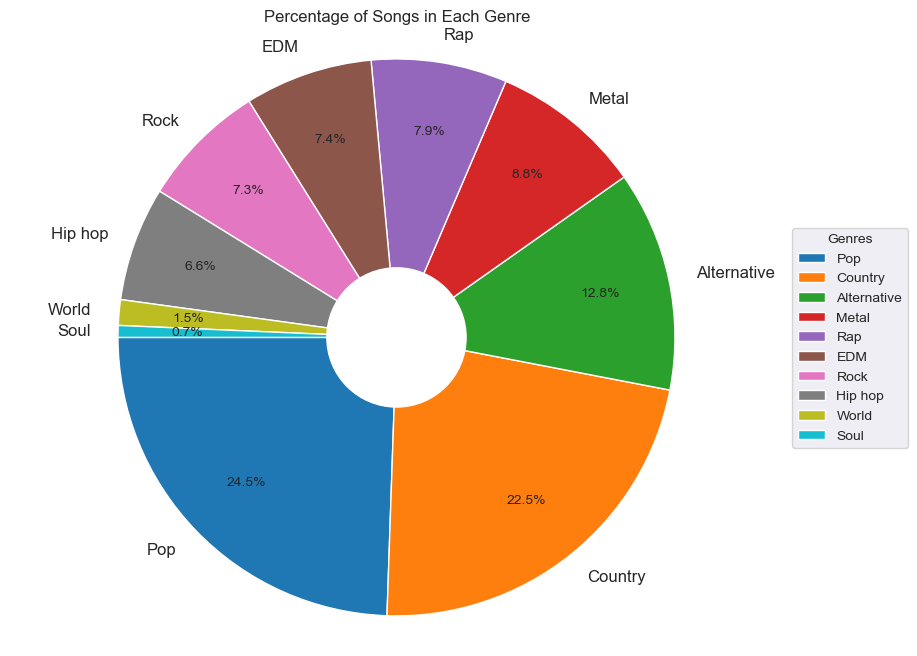

In [13]:
# Count the number of songs per genre
genre_counts = df_clean['Genre'].value_counts()

fig, ax = plt.subplots(figsize=(10, 8))

def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 0 else ''

wedges, texts, autotexts = ax.pie(
    genre_counts,
    labels=genre_counts.index,
    autopct=autopct_format,
    startangle=180,
    pctdistance=0.75
)

ax.axis('equal')
plt.setp(texts, fontsize=12)
plt.setp(autotexts, fontsize=10)
centre_circle = plt.Circle((0, 0), 0.25, fc='white')
fig.gca().add_artist(centre_circle)
plt.legend(title="Genres", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Percentage of Songs in Each Genre")

# Display the chart
plt.show()

Percentage of Songs in Each Genre in my playlist.

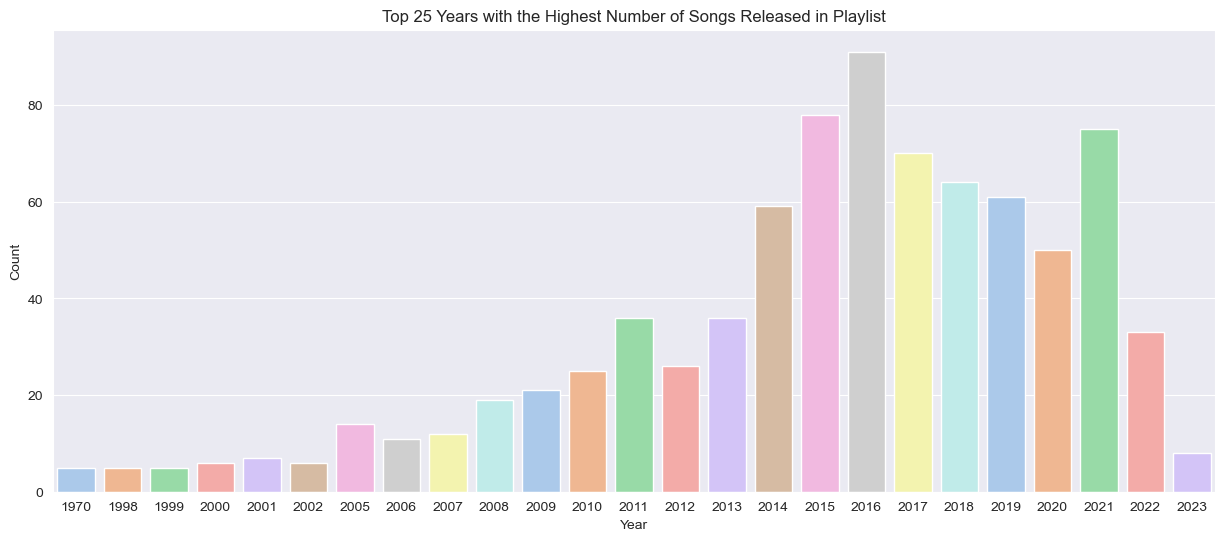

In [14]:
# Extract the year from the 'Date' column and create a new 'Year' column
year = df_clean['Release_Date'].dt.year

# Group the dataframe by 'Year' and count the instances
year_counts = year.value_counts().reset_index()
year_counts.columns = ['Year', 'Count']
year_counts = year_counts.sort_values(by='Count', ascending=False)
# Select the top 25 years
top_25_years = year_counts.head(25)

# Create a bar graph using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x='Year', y='Count', data=top_25_years, palette='pastel')
plt.title('Top 25 Years with the Highest Number of Songs Released in Playlist')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()

This graph shows my top 25 years with the highest number of songs released in the playlist. My most common years were between 2014-2021!

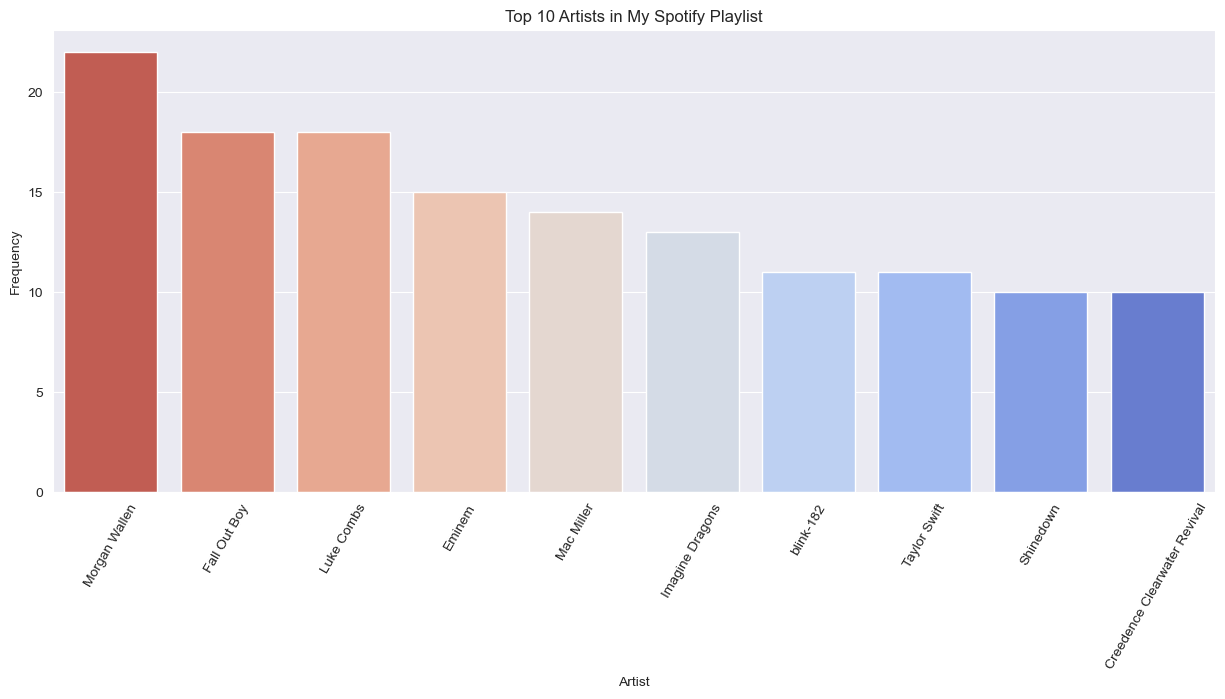

In [15]:
top_artists = df_clean['Artist'].value_counts().head(10)

top_artists_df = top_artists.reset_index()
top_artists_df.columns = ['artist', 'frequency']

# Create a color map
colors = sns.color_palette("coolwarm_r", n_colors=len(top_artists))

# Create the bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x='artist', y='frequency', data=top_artists_df, palette=colors)
plt.title('Top 10 Artists in My Spotify Playlist')
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.show()


This graph shows my top 10 artists in my Spotify playlist. It also shows how diverse my musical taste is and it shows that I don't like an artist just because they are an artist. Morgan Wallen has over 100 songs, but I only liked roughly a quarter of his songs.

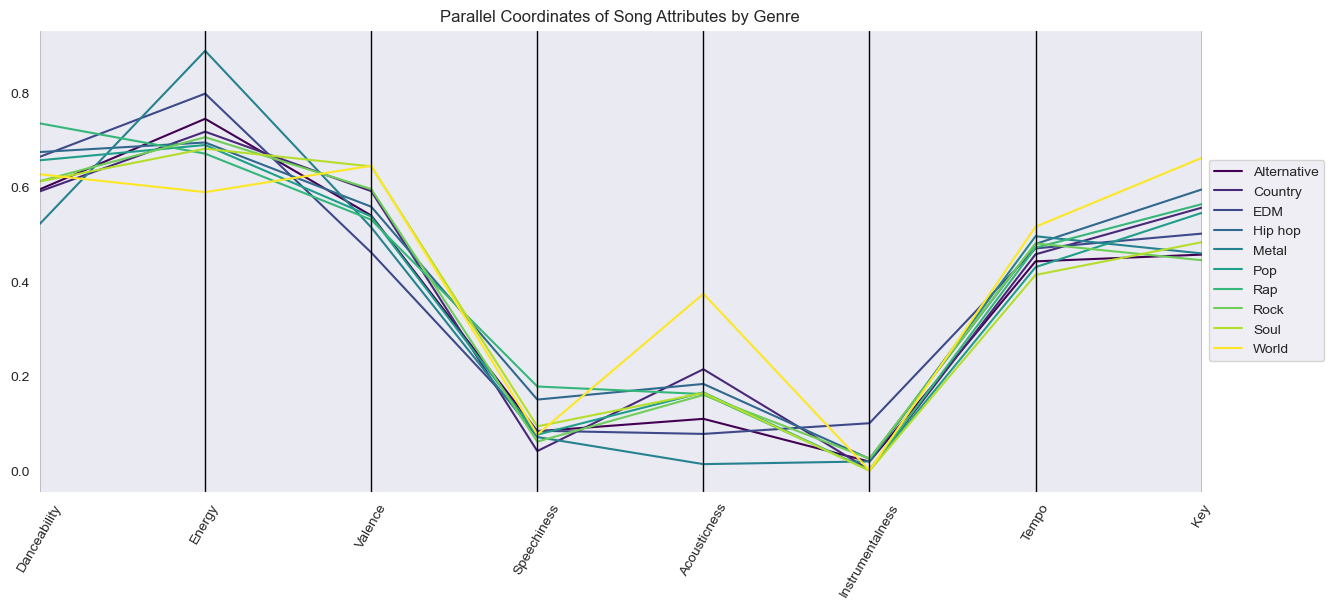

In [16]:
grouped_by_genre = df_clean.groupby('Genre')
attributes = ['Danceability', 'Energy', 'Valence', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Tempo', 'Key']
mean_by_genre = grouped_by_genre[attributes].mean()

# Create a new DataFrame with the mean values of the song attributes and genre labels
selected_data = mean_by_genre.reset_index()

selected_data['Key'] = selected_data['Key'] / 10

# Create the parallel coordinates plot
# Create the parallel coordinates plot
plt.figure(figsize=(15, 6))
ax = parallel_coordinates(selected_data, 'Genre', colormap='viridis')

# Set the legend location
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Parallel Coordinates of Song Attributes by Genre')
plt.xticks(rotation=60)
plt.show()

This graph groups all the songs by genres and analyzes the averages for each attribute. This not only shows the different genres and how they might be different because of the attributes but also shows general trend of my music as a whole!

In [70]:
datafile = "/Users/mattelms/Documents/School/R-Intro-Data-Science/Spotify_Program/PySpotify/word_counts.csv"
df_lyricsCount = pd.read_csv(datafile)
df_lyricsCountTest = df_lyricsCount

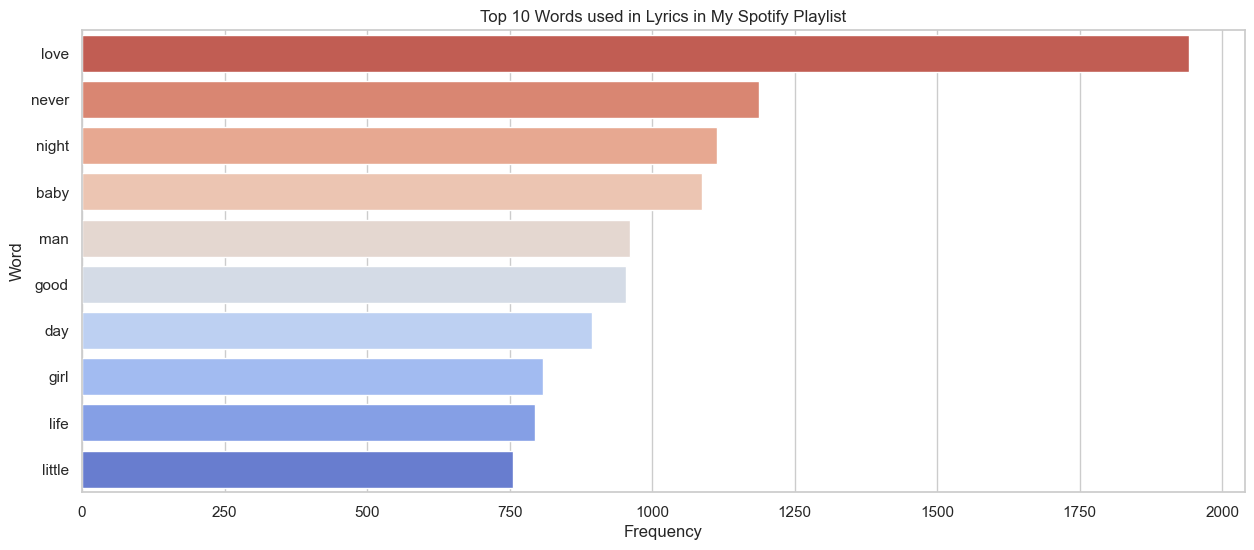

In [71]:
# Create a color map with green and blue colors
colors = sns.color_palette("coolwarm_r", n_colors=10)

# Create the bar chart
plt.figure(figsize=(15, 6))
sns.barplot(y='word', x='count', data=df_lyricsCount.head(10), palette=colors)
plt.title('Top 10 Words used in Lyrics in My Spotify Playlist')
plt.ylabel('Word')
plt.xlabel('Frequency')
plt.show()

This graph depicts the top ten words used in lyrics in my Spotify playlist. I find it an interesting way to use NLP to discover the type of music I listen to.

This is to explore Natural Language Processing, I feel as 'Bad' words are part of natural language, they should be processed as well. Artists add 'bad' words to music to convey how they truly feel. My time in the service was littered with the use of foul language, however, it was natural and ingrained in us. I felt it would be an interesting perspective to look at all my favorite musics lyrics, but I would be doing an injustice to not analyze what might be the most important, thought-provoking words artists use in their music and why I listen to them. I will censor any foul words as this IS a school project.

In [87]:
bad = ['Censored']
# create Boolean mask based on whether word is in valid_words list
mask = df_lyricsCount['word'].isin(bad).copy()
# select rows that match the mask
df_badWords = df_lyricsCount.loc[mask]
# print filtered DataFrame
df_badWords

In [102]:
def remove_prefix_suffix(word):
    # remove 'ing' suffix
    word = re.sub(r'ing$', '', word)
    # remove 'es' prefix
    word = re.sub(r'es', '', word)
    # remove ' ' prefix
    word = re.sub(r' ', '', word)
    # remove 'rs' prefix
    word = re.sub(r'rs', 'r', word)
    # remove 'ks' prefix
    word = re.sub(r'ks', 'k', word)
    return word

# apply function to DataFrame column
df_badWords.loc[0:9, 'word'] = df_badWords['word'].apply(remove_prefix_suffix)
df_sum = df_badWords.groupby('word').agg({'count': 'sum'})
# print modified DataFrame
df_sum = df_sum.sort_values('count', ascending=False).reset_index()
df_sum

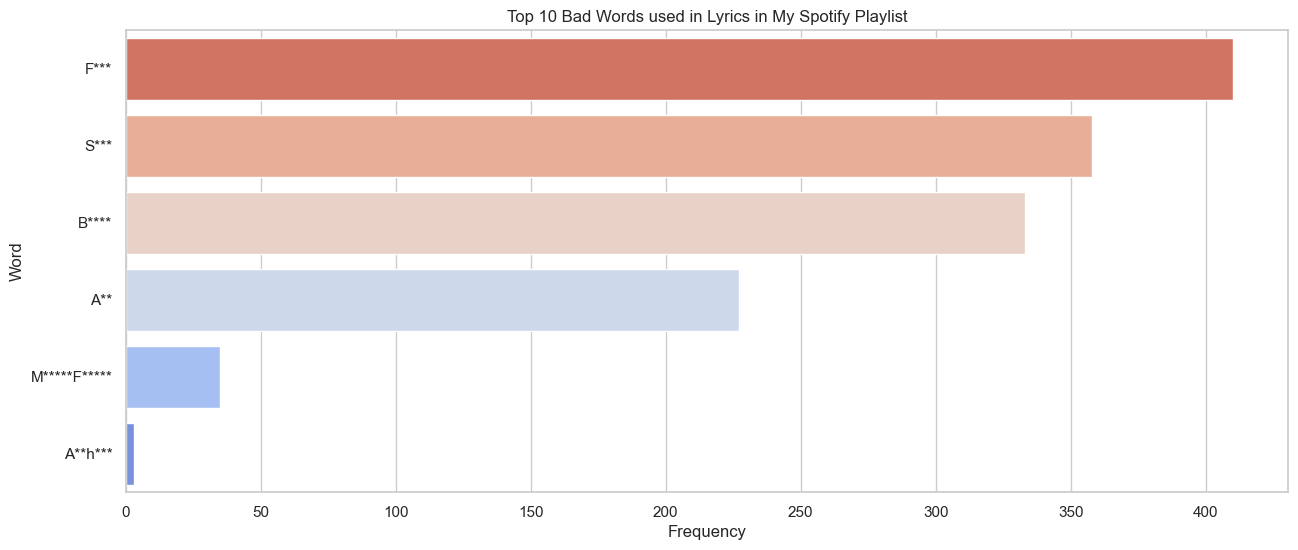

In [103]:
# Change labels
labels = ['F***', 'S***', 'B****', 'A**', 'M*****F*****', 'A**h***']

# Create the bar chart
plt.figure(figsize=(15, 6))
ax = sns.barplot(y='word', x='count', data=df_sum, palette="coolwarm_r")
ax.set_yticklabels(labels)
plt.title('Top 10 Bad Words used in Lyrics in My Spotify Playlist')
plt.ylabel('Word')
plt.xlabel('Frequency')
plt.show()

This graph depicts the top ten bad words used in lyrics in my Spotify playlist. Censored obviously.

In [ ]:
"""
datafile = "/Users/mattelms/Documents/School/R-Intro-Data-Science/Spotify_Program/PySpotify/everything_lyrics.csv"
df_lyrics = pd.read_csv(datafile)
df_lyrics['sentiment'] = 0.0

# Analyze sentiment for each song
for i, row in df_lyrics.iterrows():
    lyrics = row['Lyrics']
    blob = TextBlob(lyrics, analyzer=NaiveBayesAnalyzer())
    sentiment = blob.sentiment.p_pos - blob.sentiment.p_neg
    df_lyrics.at[i, 'sentiment'] = sentiment

# Classify songs as positive or negative based on sentiment score
df_lyrics['sentiment_category'] = df_lyrics['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative')

# Print the first 10 songs and their sentiment categories
df_sent = df_lyrics[['Song', 'Artist', 'sentiment_category']]
"""

In [ ]:
datafile = "/Users/mattelms/Documents/School/R-Intro-Data-Science/Spotify_Program/PySpotify/sentiments.csv"
df_sent1 = pd.read_csv(datafile)

In [20]:
df_sent1

,Song,Artist,sentiment_category
0,100 Grandkids,Mac Miller,positive
1,10:35,Tiësto,positive
2,"1, 2 Many",Luke Combs,positive
3,1901,Phoenix,positive
4,2055,Sleepy Hallow,positive
...,...,...,...
858,Daylight,David Kushner,positive
859,Violet,Connor Price,positive
860,Spinnin,Connor Price,negative
861,Buddy,Connor Price,positive


In [21]:
attSentiments = pd.merge(df_sent1, df_clean, on=['Song','Artist'])

In [22]:
attSentiments

,Song,Artist,sentiment_category,Genre,Album,Release_Date,Popularity,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,100 Grandkids,Mac Miller,positive,Hip hop,GO:OD AM,2015-09-18,65,0.735,0.749,10,0.811862,0.0874,0.3710,0.000000,0.4700,0.373,0.280841
1,10:35,Tiësto,positive,EDM,10:35,2022-11-03,89,0.696,0.793,8,0.700227,0.0970,0.0683,0.000004,0.1800,0.698,0.444883
2,"1, 2 Many",Luke Combs,positive,Country,What You See Is What You Get,2019-11-08,73,0.540,0.821,6,0.810556,0.0873,0.0397,0.000000,0.4230,0.685,0.624590
3,1901,Phoenix,positive,Alternative,Wolfgang Amadeus Phoenix,2009-05-25,6,0.591,0.831,0,0.705108,0.0415,0.0605,0.000047,0.1900,0.705,0.595171
4,2055,Sleepy Hallow,positive,Rap,Still Sleep?,2021-06-02,82,0.829,0.512,6,0.692736,0.1870,0.4920,0.000000,0.1200,0.638,0.198417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,I Ain't Worried,OneRepublic,positive,Rock,I Ain’t Worried (Music From The Motion Picture...,2022-05-13,93,0.704,0.797,0,0.689217,0.0475,0.0826,0.000745,0.0546,0.825,0.569645
859,golden hour,JVKE,positive,Alternative,this is what ____ feels like (Vol. 1-4),2022-09-23,90,0.515,0.593,4,0.753121,0.0322,0.6530,0.162000,0.2500,0.153,0.285515
860,Daylight,David Kushner,positive,Rap,Daylight,2023-04-14,94,0.508,0.430,2,0.487855,0.0335,0.8300,0.000441,0.0930,0.324,0.507835
861,Buddy,Connor Price,positive,Rap,Buddy,2022-12-30,69,0.914,0.506,6,0.720658,0.2230,0.2040,0.000000,0.1030,0.428,0.569777


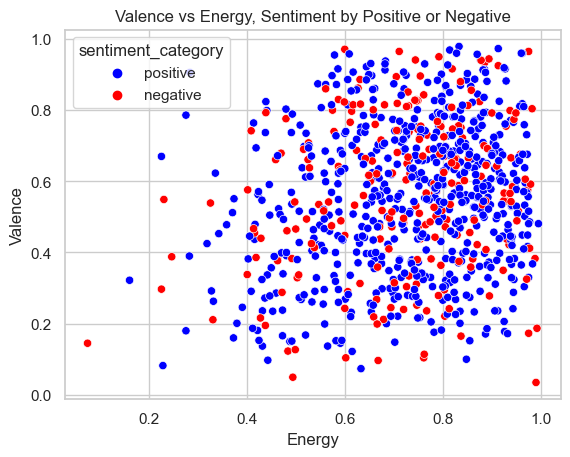

In [105]:
# Create a scatterplot with Sentiment variable determining color
sns.scatterplot(x='Energy', y='Valence', hue='sentiment_category', data=attSentiments, palette=['blue', 'red'])

# Add axis labels and title
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.title('Valence vs Energy, Sentiment by Positive or Negative')

plt.show()

Valence and Energy are the most common attributes according to the Spotify API that define how positive (good feeling) or negative (bad feeling) the song is.
I wanted to compare the valence and energy of positive and negative songs according to the NB analyzer. However, I am not sure if there was a correlation between them. I'm glad there was not a correlation because valence and energy describe the beat and tone of the song, whereas NLP is analyzing the lyrics of the song alone.

Optimization terminated successfully.
         Current function value: 0.569990
         Iterations 5


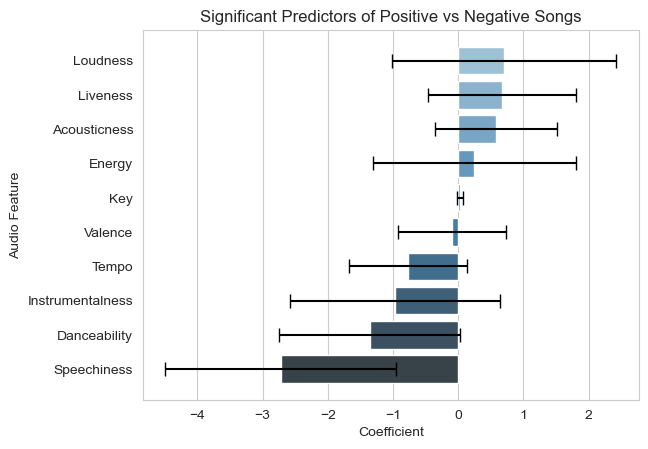

In [25]:
correlation = attSentiments.loc[:, ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'sentiment_category']]
correlation['pos_neg'] = correlation['sentiment_category'].apply(lambda x: 1 if x == 'positive' else 0)

X = correlation.drop(['sentiment_category', 'pos_neg'], axis=1)
y = correlation['pos_neg']
X = sm.add_constant(X)

# Fit a logistic regression model
model = sm.Logit(y, X).fit()

# Get the coefficients and their confidence intervals
coef_df = model.params.to_frame('coef')
coef_df['lower'] = model.conf_int()[0]
coef_df['upper'] = model.conf_int()[1]

# Sort the coefficients
coef_df = coef_df.iloc[1:].sort_values('coef', ascending=False)

# Create a bar chart of the coefficients and their confidence intervals
sns.set_style('whitegrid')
sns.barplot(x='coef', y=coef_df.index, data=coef_df, palette='Blues_d')
plt.errorbar(x=coef_df['coef'], y=coef_df.index, xerr=[coef_df['coef'] - coef_df['lower'], coef_df['upper'] - coef_df['coef']], fmt='none', capsize=5, color='black')
plt.xlabel('Coefficient')
plt.ylabel('Audio Feature')
plt.title('Significant Predictors of Positive vs Negative Songs')
plt.show()

This graph depicts the significant predictors of positive and negative songs according to the NB analyzer when correlated with the attributes provided by Spotify.
This shows loudness has a higher correlation to Positive songs and speechiness has a higher correlation to Negative songs.